####  Distance Method for analysis
- Hierarchical Clustering
    - Agglomeretive
    - Divisive
- Non-Hierarchical Clustering
    - K-Means
    - DBSCAN

#  Hierarchical Clstering
- How it take distance Between Two Clusters :
  - Average Linkage (average distance)
  - Centroid Linkage
  - Single Linkage (Minimulm distance method)
  - Complete Linkage (Maximum distance method)
  - Ward : ANOVA sum of squares between the two clusters added up over the variables

In [86]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [135]:
milk = pd.read_csv('milk.csv',index_col=0)
milk.head()

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10


In [136]:
scaler = StandardScaler().set_output(transform='pandas')
milk_sclaed = scaler.fit_transform(milk)

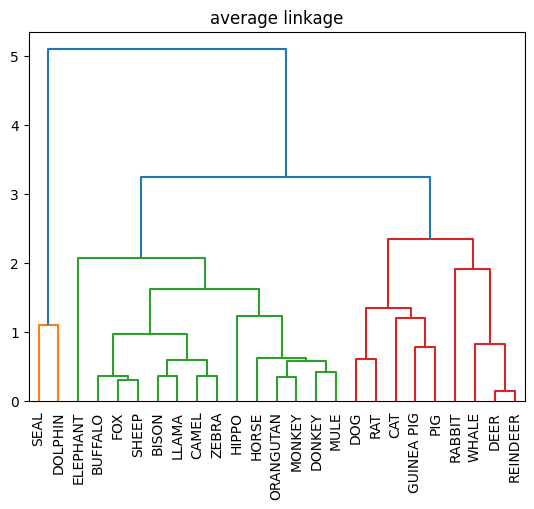

In [137]:
link = 'average'
threshold = 2.8
merging = linkage(milk_sclaed, method=link)
dendrogram(merging, labels=list(milk_sclaed.index),color_threshold=threshold)
plt.title(link+' linkage')
plt.xticks(rotation=90)
plt.show()

# 1. Agglomerative cluster

In [138]:
clust = AgglomerativeClustering(n_clusters=3, linkage='average')
clust.fit(milk_sclaed)
clust.labels_
# here three cluster (0,1,2)- 

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [139]:
milk_sclaed.index

Index(['HORSE', 'ORANGUTAN', 'MONKEY', 'DONKEY', 'HIPPO', 'CAMEL', 'BISON',
       'BUFFALO', 'GUINEA PIG', 'CAT', 'FOX', 'LLAMA', 'MULE', 'PIG', 'ZEBRA',
       'SHEEP', 'DOG', 'ELEPHANT', 'RABBIT', 'RAT', 'DEER', 'REINDEER',
       'WHALE', 'SEAL', 'DOLPHIN'],
      dtype='object', name='Animal')

In [140]:
df_clustered = pd.DataFrame({'Animal': list(milk_sclaed.index),
            'cluster': clust.labels_})
df_clustered.sort_values('cluster')

,Animal,cluster
22,WHALE,0
21,REINDEER,0
20,DEER,0
19,RAT,0
18,RABBIT,0
16,DOG,0
8,GUINEA PIG,0
9,CAT,0
13,PIG,0
24,DOLPHIN,1


In [141]:
# temperory to see Sorted values respect to cluster number
a = df_clustered.sort_values('cluster')
print(a[a['cluster'] == 0])
# print(a[a['cluster'] == 1]
# print(a[a['cluster'] == 2])

        Animal  cluster
22       WHALE        0
21    REINDEER        0
20        DEER        0
19         RAT        0
18      RABBIT        0
16         DOG        0
8   GUINEA PIG        0
9          CAT        0
13         PIG        0


# Silhouette Score 
- The Silhouette Score is calsulated using the mean intra-cluster distance(a) and the mean nearest-clusters distance(b) for each observations
- The Silhouette Coefficient for any observations (b-a) / max(a,b)
- Silhouette Score is calculated as mean of all thr silhouette coefficient for all the observations
- Bigger the score is best Clustering
- Bigger the Cohesivity best the or bigger the silhouette score

In [142]:
clust = AgglomerativeClustering(n_clusters=3, linkage='average')
clust.fit(milk_sclaed)
silhouette_score(milk_sclaed, clust.labels_)

0.48757649189546187

### Evaluate the Ssilhouette score for different number of score

In [143]:
score = []
n_clust = [2,3,4,5,6]
for i in n_clust:
    clust = AgglomerativeClustering(n_clusters=i, linkage='average')
    clust.fit(milk_sclaed)
    score.append(silhouette_score(milk_sclaed, clust.labels_))
print(score)

i_max = np.argmax(score)                                 # Return the index of best score number
print("Best No. of Clusters : ", n_clust[i_max] )        # Return the best score number
best_score  = np.max(score)                              # Return Best score
print("Best score is        : ",best_score)

[0.5186847578981009, 0.48757649189546187, 0.416015383673761, 0.3830100222472541, 0.3742842300357041]
Best No. of Clusters :  2
Best score is        :  0.5186847578981009


#### On the basis of Silhouette Score we take  best no. of cluster which s give by silhouette score

In [144]:
clust = AgglomerativeClustering(n_clusters=2, linkage='average')
clust.fit(milk_sclaed)
silhouette_score(milk_sclaed, clust.labels_)

0.5186847578981009

### ON === > US ARREST ------> DATASET ============================================

In [145]:
us = pd.read_csv('USArrests.csv',index_col=0)

In [146]:
scaler = StandardScaler().set_output(transform='pandas')
us_sclaed = scaler.fit_transform(us)

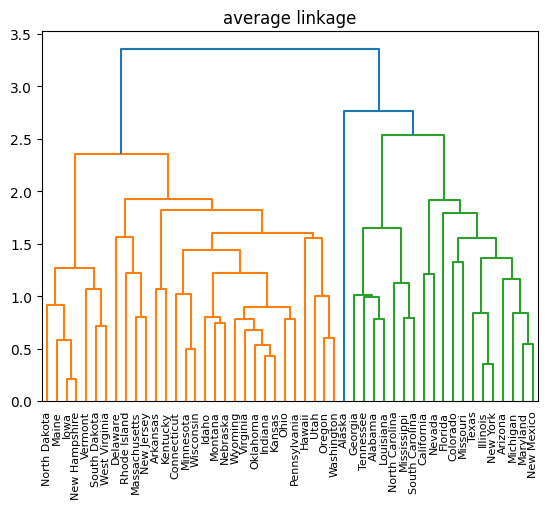

In [147]:
link = 'average'
threshold = 2.7
merging = linkage(us_sclaed, method=link)
dendrogram(merging, labels=list(us_sclaed.index),color_threshold=threshold)
plt.title(link+' linkage')
plt.xticks(rotation=90)
plt.show()

In [148]:
# Agglomerative H. Clustering
score = []
n_clust = [2,3,4,5,6]
for i in n_clust:
    clust = AgglomerativeClustering(n_clusters=i, linkage='average')
    clust.fit(us_sclaed)
    score.append(silhouette_score(us_sclaed, clust.labels_))

# We Mearge the cells
i_max = n_clust[np.argmax(score)]
print("Best No. of Clusters : ", i_max )

clust = AgglomerativeClustering(n_clusters=i_max, linkage='average')
clust.fit(us_sclaed)
print("Best Silouette Score is :",silhouette_score(us_sclaed, clust.labels_))

Best No. of Clusters :  2
Best Silouette Score is : 0.4084890326217641


# Non-Hierarchical Clustering

# 1. DBSCAN (Density-Based Spatial Clustering of Application with Noise)
- Parameters :
  - Epsilon : Radius of the neighbourhood of point
  - Minimum points : Number of points to be required to form a dense region (a Cluster)
  - inliers = Without Outliers [!=-1]

In [149]:
from sklearn.cluster import DBSCAN

# DBSCAN ON MILK DATASET =================================

In [150]:
eps_range = [0.2,0.4,0.6,1]
mp_range = [2,3,4,5]
cnt = 0
a =[]
for i in eps_range:
    for j in mp_range:
        clust_DB = DBSCAN(eps=i, min_samples=j)
        clust_DB.fit(milk_sclaed.iloc[:,:5])
        if len(set(clust_DB.labels_)) > 2:
            # it is just a counter
            cnt = cnt + 1
            # by this we are getting cluster label (-1 for outliers) and adding into column
            milk_sclaed['Clust'] = clust_DB.labels_
            # here we are extracting the data without outliers(-1) so we can calculate the silhouette_score
            milk_scl_inliers = milk_sclaed[milk_sclaed['Clust']!=-1]
            # calculatng silhouette sscore
            sil_sc = silhouette_score(milk_scl_inliers.iloc[:,:-1],  # this is data without cluster label
                             milk_scl_inliers.iloc[:,-1]) # this is only clustered label data
            # here making a list of score with different parameter for every parameter
            a.append([cnt,i,j,sil_sc])
            print(i,j,sil_sc)
# Making Dataframe of every parameter 
a = np.array(a)
pa = pd.DataFrame(a,columns=['Sr','eps','min_point','silouette score'])
print("Best Paramters:")
pa[pa['silouette score'] == pa['silouette score'].max()]


0.4 2 0.6518937593821538
0.4 3 0.5385180352469559
0.6 2 0.5934459505692155
0.6 3 0.5344431042454363
0.6 4 0.5519747727201489
1 2 0.4344818095328392
1 3 0.6473871775367226
Best Paramters:


,Sr,eps,min_point,silouette score
0,1.0,0.4,2.0,0.651894


### DBSCAN with Best Parameters

In [115]:
clust_DB = DBSCAN(eps=0.4, min_samples=2)
clust_DB.fit(milk_sclaed.iloc[:,:5])
print(clust_DB.labels_)
print(len(set(clust_DB.labels_)))

[-1  0  0 -1 -1  1  1  2 -1 -1  2  1 -1 -1  1  2 -1 -1 -1 -1  3  3 -1 -1
 -1]
5


## Cluster Analysis

In [121]:
milk_clust = milk.copy()

In [123]:
# adding the cluster label into dataframe
milk_clust['cluster'] = clust_DB.labels_
milk_clust

,water,protein,fat,lactose,ash,cluster
Animal,,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35,-1
ORANGUTAN,88.5,1.4,3.5,6.0,0.24,0
MONKEY,88.4,2.2,2.7,6.4,0.18,0
DONKEY,90.3,1.7,1.4,6.2,0.40,-1
HIPPO,90.4,0.6,4.5,4.4,0.10,-1
CAMEL,87.7,3.5,3.4,4.8,0.71,1
BISON,86.9,4.8,1.7,5.7,0.90,1
BUFFALO,82.1,5.9,7.9,4.7,0.78,2
GUINEA PIG,81.9,7.4,7.2,2.7,0.85,-1


In [124]:
# eliminating the outliers
milk_clust = milk_clust[milk_clust['cluster'] != -1]
milk_clust

,water,protein,fat,lactose,ash,cluster
Animal,,,,,,
ORANGUTAN,88.5,1.4,3.5,6.0,0.24,0
MONKEY,88.4,2.2,2.7,6.4,0.18,0
CAMEL,87.7,3.5,3.4,4.8,0.71,1
BISON,86.9,4.8,1.7,5.7,0.90,1
BUFFALO,82.1,5.9,7.9,4.7,0.78,2
FOX,81.6,6.6,5.9,4.9,0.93,2
LLAMA,86.5,3.9,3.2,5.6,0.80,1
ZEBRA,86.2,3.0,4.8,5.3,0.70,1
SHEEP,82.0,5.6,6.4,4.7,0.91,2


In [125]:
# calculating the mean on the basis of cluster label
milk_clust.groupby('cluster').mean()


,water,protein,fat,lactose,ash
cluster,,,,,
0,88.450,1.800000,3.100000,6.200000,0.210000
1,86.825,3.800000,3.275000,5.350000,0.777500
2,81.900,6.033333,6.733333,4.766667,0.873333
3,65.350,10.550000,20.000000,2.550000,1.400000


# DBSCAN on US crime Dataset ================

In [126]:
eps_range = [0.2,0.4,0.6,1]
mp_range = [2,3,4,5]
cnt = 0
a =[]
for i in eps_range:
    for j in mp_range:
        clust_DB = DBSCAN(eps=i, min_samples=j)
        clust_DB.fit(us_sclaed.iloc[:,:5])
        if len(set(clust_DB.labels_)) > 2:
            cnt = cnt + 1
            us_sclaed['Clust'] = clust_DB.labels_
            us_sclaed_inliers = us_sclaed[us_sclaed['Clust']!=-1]
            sil_sc = silhouette_score(us_sclaed_inliers.iloc[:,:-1],us_sclaed_inliers.iloc[:,-1])
            a.append([cnt,i,j,sil_sc])
            print(i,j,sil_sc)
    
a = np.array(a)
pa = pd.DataFrame(a,columns=['Sr','eps','min_pt','sil'])
print("Best Paramters:")
pa[pa['sil'] == pa['sil'].max()]

0.4 2 0.9294801120696734
0.6 2 0.4598846166598501
0.6 3 0.7189015458613475
1 2 0.11526083405519487
1 3 0.11526083405519487
1 4 0.21075699219922686
1 5 0.22417529426027305
Best Paramters:


,Sr,eps,min_pt,sil
0,1.0,0.4,2.0,0.92948


In [127]:
clust_DB = DBSCAN(eps=0.4, min_samples=2)
clust_DB.fit(us_sclaed.iloc[:,:5])
print(clust_DB.labels_)
print(len(set(clust_DB.labels_)))

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1]
3


## Cluster Analysis

In [133]:
us_clust = us.copy()

# adding the cluster label into dataframe
us_clust['cluster'] = clust_DB.labels_

# eliminating the outliers
us_clust = us_clust[us_clust['cluster'] != -1]

# Analysing the individual
print(us_clust.sort_values('cluster'))

# calculating the mean on the basis of cluster label
us_clust.groupby('cluster').mean()


               Murder  Assault  UrbanPop  Rape  cluster
Illinois         10.4      249        83  24.0        0
New York         11.1      254        86  26.1        0
Iowa              2.2       56        57  11.3        1
New Hampshire     2.1       57        56   9.5        1


,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,10.75,251.5,84.5,25.05
1,2.15,56.5,56.5,10.40
